<a href="https://colab.research.google.com/github/aman-singanamala/Basic_Image_Classification_/blob/main/CNN_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
X_train = np.loadtxt('/content/drive/MyDrive/dataset/input.csv', delimiter = ',')
Y_train = np.loadtxt('/content/drive/MyDrive/dataset/labels.csv', delimiter = ',')
X_test = np.loadtxt('/content/drive/MyDrive/dataset/input_test.csv', delimiter = ',')
Y_test = np.loadtxt('/content/drive/MyDrive/dataset/labels_test.csv', delimiter = ',')

In [24]:
X_train=X_train.reshape(len(X_train),100,100,3)
Y_train = Y_train.reshape(len(Y_train), 1)
X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)
X_train = X_train/255.0  # Scaling the values from 0-1
X_test = X_test/255.0   # Scaling the values from 0-1

In [25]:
print("Shape of X_train : ",X_train.shape)
print("Shape of Y_train : ",Y_train.shape)
print("Shape of X_test : ",X_test.shape)
print("Shape of Y_train : ",Y_train.shape)

Shape of X_train :  (2000, 100, 100, 3)
Shape of Y_train :  (2000, 1)
Shape of X_test :  (400, 100, 100, 3)
Shape of Y_train :  (2000, 1)


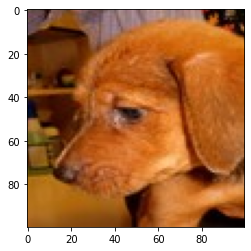

In [27]:
idx= random.randint(0,len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

# MODEL


In [31]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [32]:

# Defining Model
model= Sequential()

#Adding Convolution Layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)))

#Adding Pooling Layer
model.add(MaxPooling2D(2,2))

#Adding Fully Connected Layer
model.add(Flatten())
model.add(Dense(64,activation='relu'))

#Adding Output Layer
model.add(Dense(1,activation='sigmoid'))

#compiling the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

#fitting the model
model.fit(X_train,Y_train,epochs=10,batch_size=64)




Epoch 1/10
32/32 [==============================] - 12s 365ms/step - loss: 1.1864 - accuracy: 0.5080
Epoch 2/10
32/32 [==============================] - 12s 381ms/step - loss: 0.6788 - accuracy: 0.5500
Epoch 3/10
32/32 [==============================] - 12s 363ms/step - loss: 0.6068 - accuracy: 0.6870
Epoch 4/10
32/32 [==============================] - 12s 385ms/step - loss: 0.5257 - accuracy: 0.7565
Epoch 5/10
32/32 [==============================] - 12s 372ms/step - loss: 0.4668 - accuracy: 0.8005
Epoch 6/10
32/32 [==============================] - 12s 376ms/step - loss: 0.4095 - accuracy: 0.8365
Epoch 7/10
32/32 [==============================] - 12s 376ms/step - loss: 0.3658 - accuracy: 0.8675
Epoch 8/10
32/32 [==============================] - 12s 375ms/step - loss: 0.3055 - accuracy: 0.8975
Epoch 9/10
32/32 [==============================] - 12s 372ms/step - loss: 0.2673 - accuracy: 0.9190
Epoch 10/10
32/32 [==============================] - 12s 371ms/step - loss: 0.2341 - accura

In [33]:
model.evaluate(X_test,Y_test)

13/13 [==============================] - 1s 63ms/step - loss: 0.6186 - accuracy: 0.6700


[0.6185711622238159, 0.6700000166893005]

# Making Predictions

The built Model says it is a : Cat


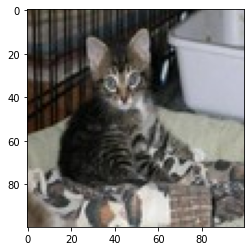

In [40]:

idx2= random.randint(0,len(Y_test))
plt.imshow(X_test[idx2, :])

y_pred= model.predict(X_test[idx2, : ].reshape(1,100,100,3))
y_pred=y_pred>0.5
if(y_pred==0):
  pred='Dog'
else:
  pred='Cat'
print("The built Model says it is a :",pred)